In [8]:
setwd('C:/Users/Tim/Documents/DAND/P4/ProsperLoanProject/ProsperLoanEDA/data')
getwd()
list.files()

[1] "C:/Users/Tim/Documents/DAND/P4/ProsperLoanProject/ProsperLoanEDA/data"

[1] "prosperLoanData.csv"

In [9]:
df <- read.csv('prosperLoanData.csv')

In [11]:
library(ggplot2)
library(dplyr)

In [12]:
df$IncomeRange <- factor(df$IncomeRange, levels = c("$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", 
                                                            "$100,000+", "Not displayed", "Not employed"))

In [13]:
#Freqency of Term by Income Range
df %>%
group_by(Term, IncomeRange) %>%
summarise(num_loans = n()) %>%
head

Term,IncomeRange,num_loans
12,"$1-24,999",77
12,"$25,000-49,999",381
12,"$50,000-74,999",432
12,"$100,000+",387
12,Not employed,26
12,NA,311


In [19]:
df %>%
filter(!IncomeRange %in% c('Not displayed', 'Not employed')) %>%
filter(!is.na(IncomeRange)) %>%
group_by(Term, IncomeRange) %>%
summarise(num_loans = n()) %>%
mutate(frequency = num_loans / sum(num_loans) * 100) 



Term,IncomeRange,num_loans,frequency
12,"$1-24,999",77,6.02975724
12,"$25,000-49,999",381,29.83555208
12,"$50,000-74,999",432,33.82928739
12,"$100,000+",387,30.30540329
36,$0,617,0.91620510
36,"$1-24,999",6409,9.51695054
36,"$25,000-49,999",25485,37.84357691
36,"$50,000-74,999",22682,33.68130318
36,"$100,000+",12150,18.04196427
60,$0,4,0.02014707


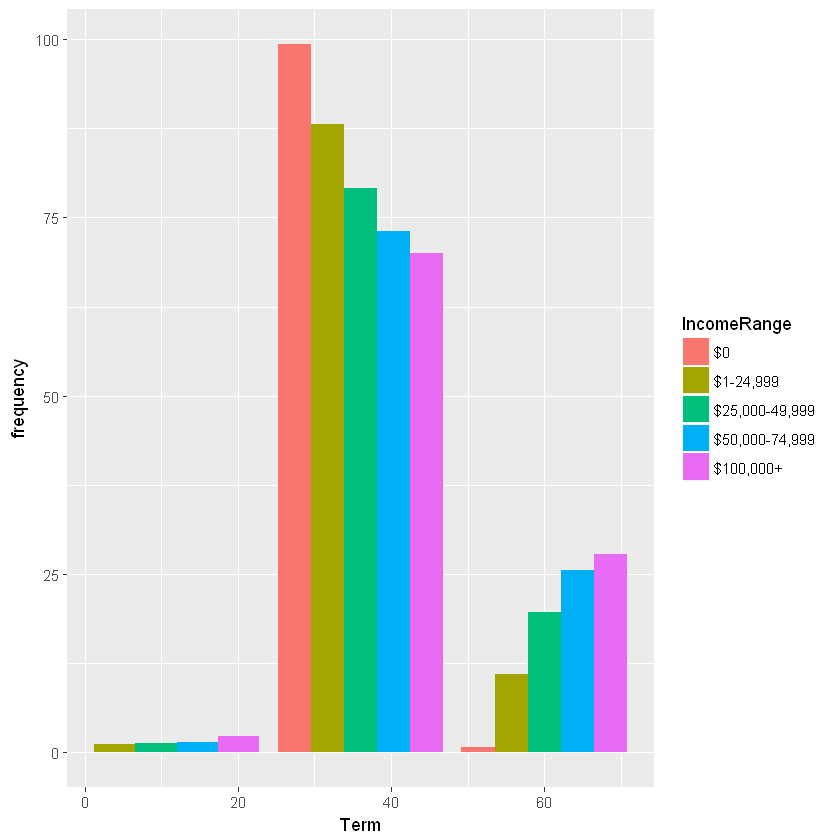

In [32]:
df %>%
filter(!IncomeRange %in% c('Not displayed', 'Not employed')) %>%
filter(!is.na(IncomeRange)) %>%
group_by(IncomeRange, Term) %>%
summarise(num_loans = n()) %>%
mutate(frequency = num_loans / sum(num_loans) * 100) %>%
ggplot(aes(x=Term, y=frequency,fill=IncomeRange)) + geom_bar(stat="identity", position="dodge")

This is interesting. In the shortest term 1-year loans the higher the Income Range the higher the portion of loans made in that income range.  
Also interesting to note is that there were no 1-year loans made to people who are in the 0% income range.  
For the middle term 3 year loans the opposite is true, and then in the 5 year term a similar pattern to the 1 yr loans reemerges.  

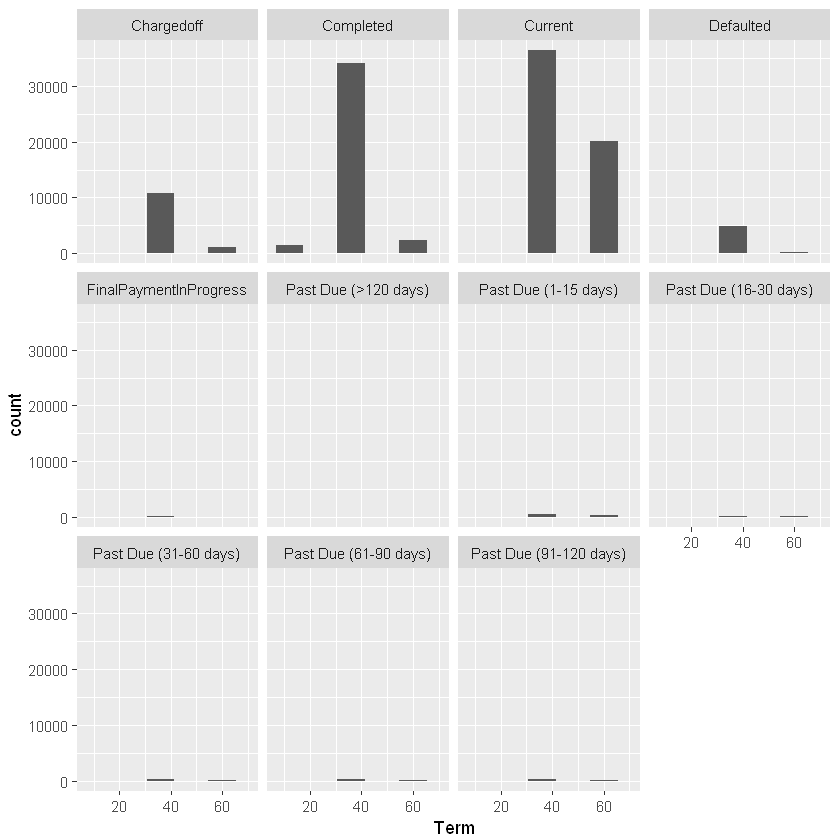

In [14]:
df %>%
filter(!LoanStatus == 'Cancelled') %>%
ggplot(aes(x=Term)) + geom_bar() + facet_wrap(~LoanStatus)

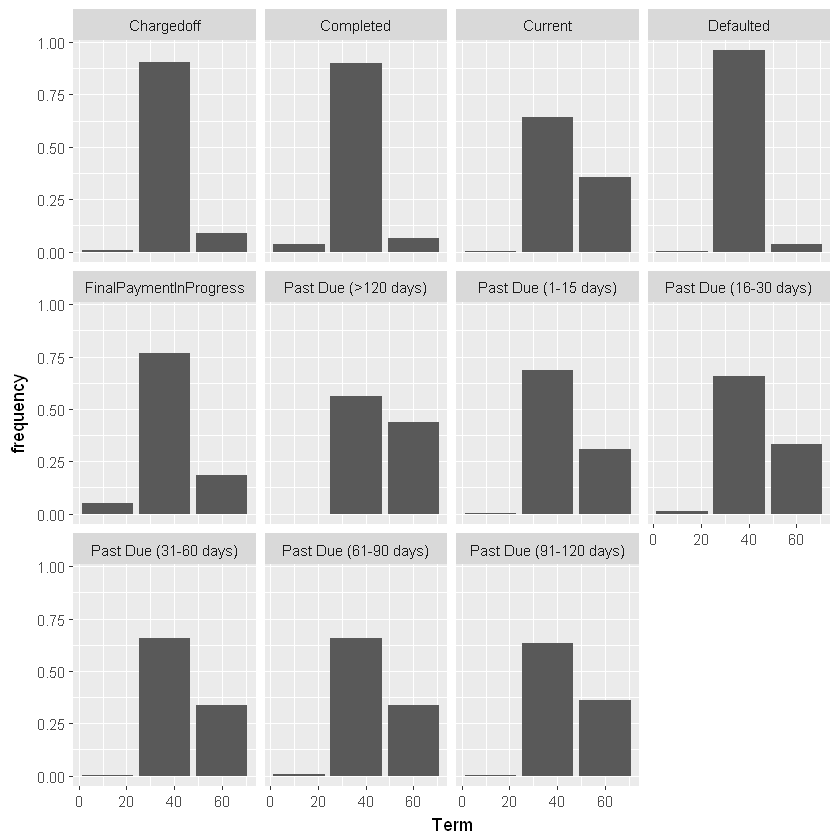

In [98]:
df %>%
filter(!LoanStatus == 'Cancelled') %>%
group_by(LoanStatus, Term) %>%
summarise(number_loans = n()) %>%
mutate(frequency = number_loans / sum(number_loans)) %>%
ggplot(aes(x=Term, y=frequency)) + geom_bar(stat="Identity") + facet_wrap(~LoanStatus)

Warning message:
"Removed 25 rows containing non-finite values (stat_boxplot)."

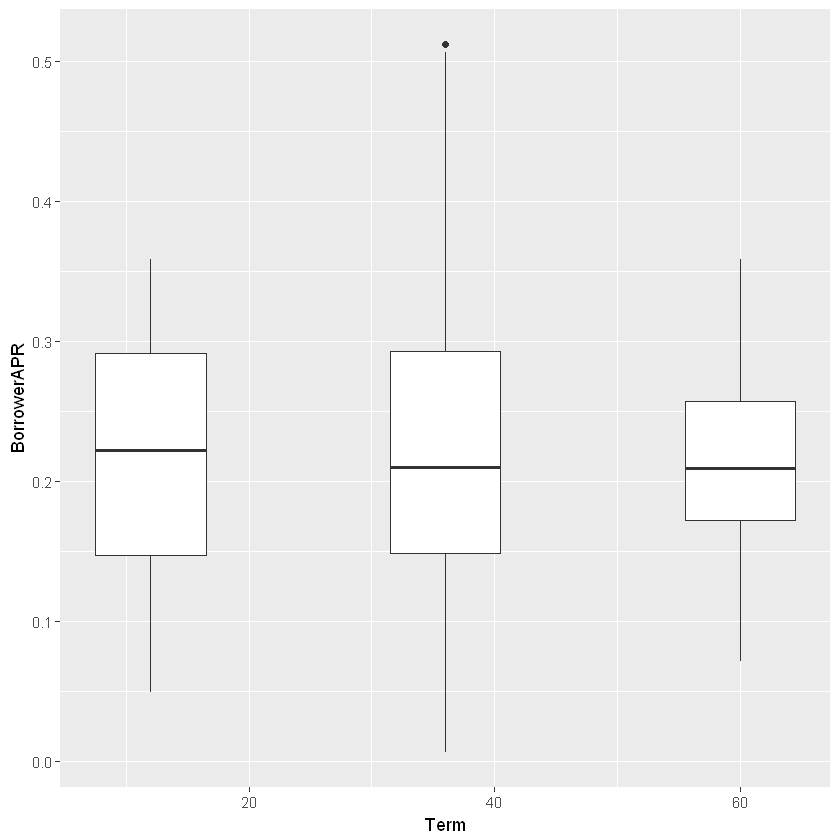

In [100]:
ggplot(df, aes(x=Term,y=BorrowerAPR, group=Term)) + geom_boxplot()

Warning message:
"Removed 29084 rows containing non-finite values (stat_boxplot)."

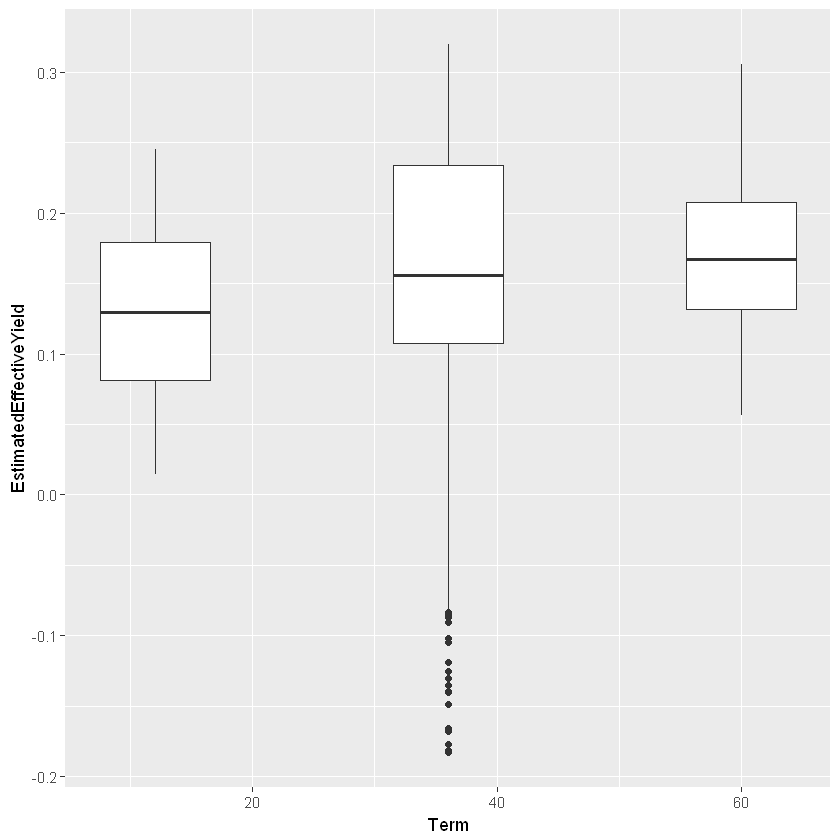

In [105]:
ggplot(df, aes(x=Term,y=EstimatedEffectiveYield,group=Term)) + geom_boxplot()

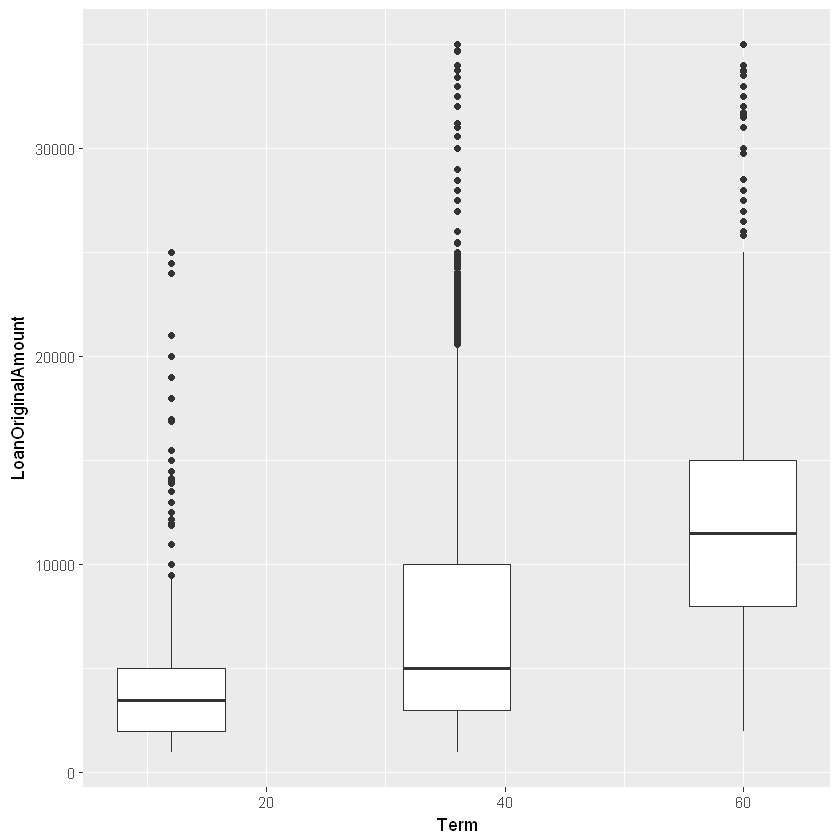

In [107]:
ggplot(df, aes(x=Term,y=LoanOriginalAmount,group=Term)) + geom_boxplot()

Warning message:
"Removed 25 rows containing non-finite values (stat_boxplot)."

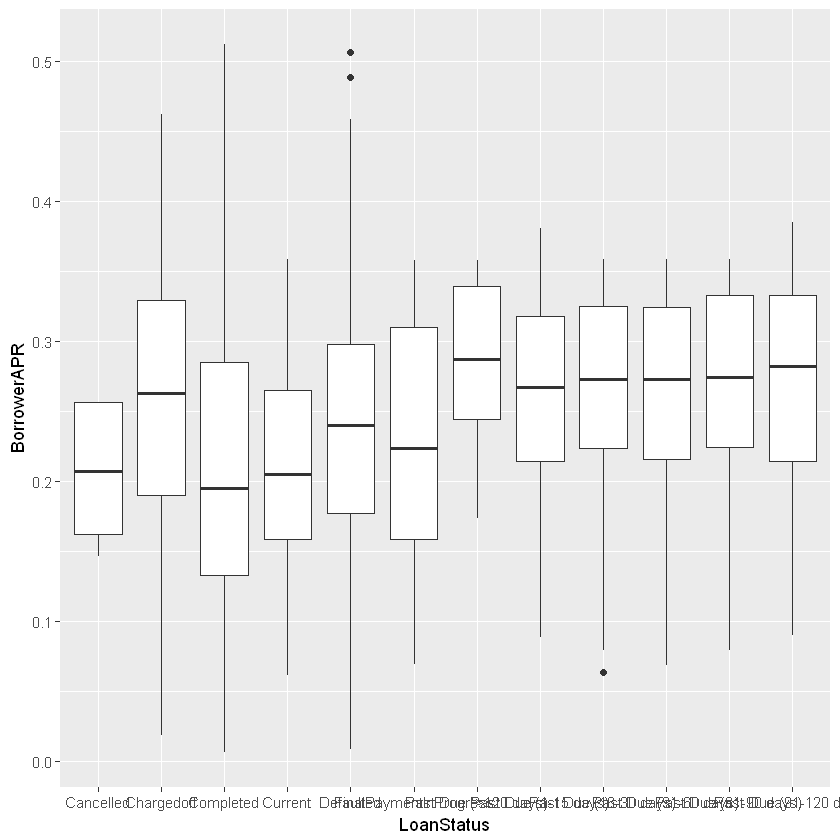

In [110]:
ggplot(df, aes(x=LoanStatus,y=BorrowerAPR,group=LoanStatus)) + geom_boxplot() 

Warning message:
"Removed 29084 rows containing non-finite values (stat_boxplot)."

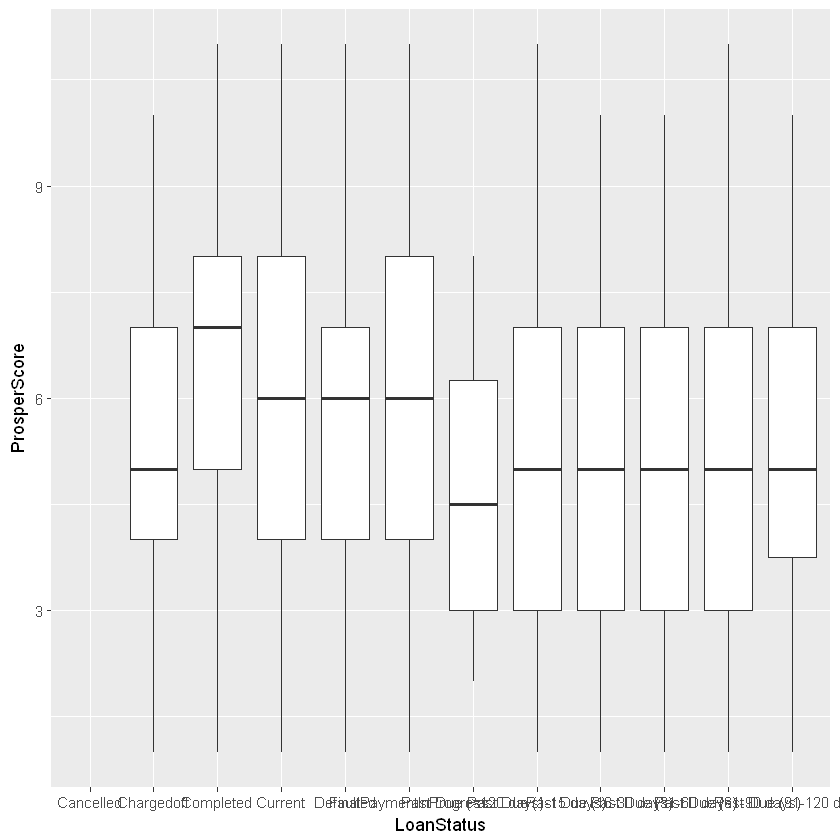

In [111]:
ggplot(df, aes(x=LoanStatus, y=ProsperScore)) + geom_boxplot() 
#need to rotate labels
#looks like Prosperscore is a good predictor

In [119]:
levels(df$LoanStatus)
#need to research difference between charged off and defaulted
#filter out cancelled
#mutate new var. combining like vars
#Final payment + Completed
#all past due
# ? defaulted + charged off ?
#make factor in order you want boxplots

[1] "Cancelled"              "Chargedoff"             "Completed"             
 [4] "Current"                "Defaulted"              "FinalPaymentInProgress"
 [7] "Past Due (>120 days)"   "Past Due (1-15 days)"   "Past Due (16-30 days)" 
[10] "Past Due (31-60 days)"  "Past Due (61-90 days)"  "Past Due (91-120 days)"

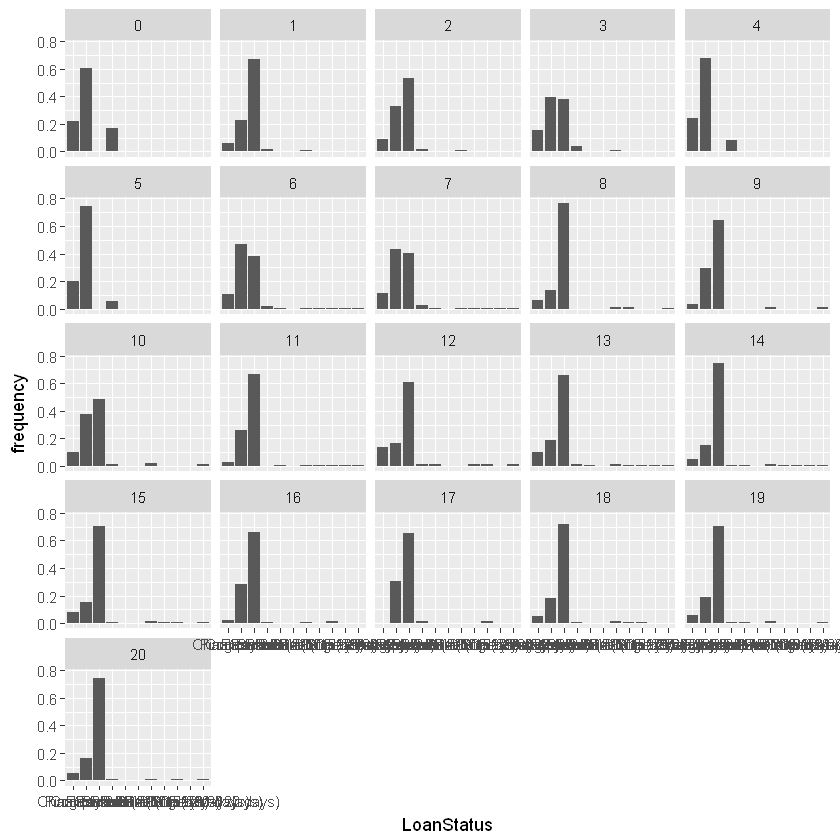

In [152]:
#Are there listing Categories that are more likely to default/go past due/etc?
#That's a shit variable name.
#need to group Loan Statuses, take frequency
df %>% 
select(ListingCategory..numeric., LoanStatus) %>%
filter(LoanStatus != 'Cancelled') %>%
group_by(ListingCategory..numeric., LoanStatus) %>% 
summarise(rows = n()) %>%
mutate(frequency = rows / sum(rows)) %>%
ggplot(aes(x=LoanStatus, y=frequency)) + geom_bar(stat="Identity") + facet_wrap(~ListingCategory..numeric.)

So there is a lot we can't see in these charts, but mostly checking for distribution here. There are a couple we could check out as abberant, and we can make these charts clearer by reducing the number of loan statuses.
<p>Definitely this is a place to zoom in. 3, 12, etc.

In [163]:
#####Loan Status  vs IncomeRange / filter with IncomeVerifiable
#IncomeVerifiable not a true bool?
#graph after fixing Loan Stuats levels
df %>%
filter(IncomeVerifiable == 'True') %>%
group_by(IncomeRange, LoanStatus) %>%
summarise(rows = n()) %>%
mutate(frequency = rows / sum(rows))


IncomeRange,LoanStatus,rows,frequency
$0,Chargedoff,10,4.347826e-01
$0,Completed,12,5.217391e-01
$0,Current,1,4.347826e-02
"$1-24,999",Chargedoff,1128,1.804800e-01
"$1-24,999",Completed,2494,3.990400e-01
"$1-24,999",Current,2199,3.518400e-01
"$1-24,999",Defaulted,286,4.576000e-02
"$1-24,999",FinalPaymentInProgress,10,1.600000e-03
"$1-24,999",Past Due (1-15 days),45,7.200000e-03
"$1-24,999",Past Due (16-30 days),19,3.040000e-03


Warning message:
"Removed 591 rows containing missing values (geom_point)."

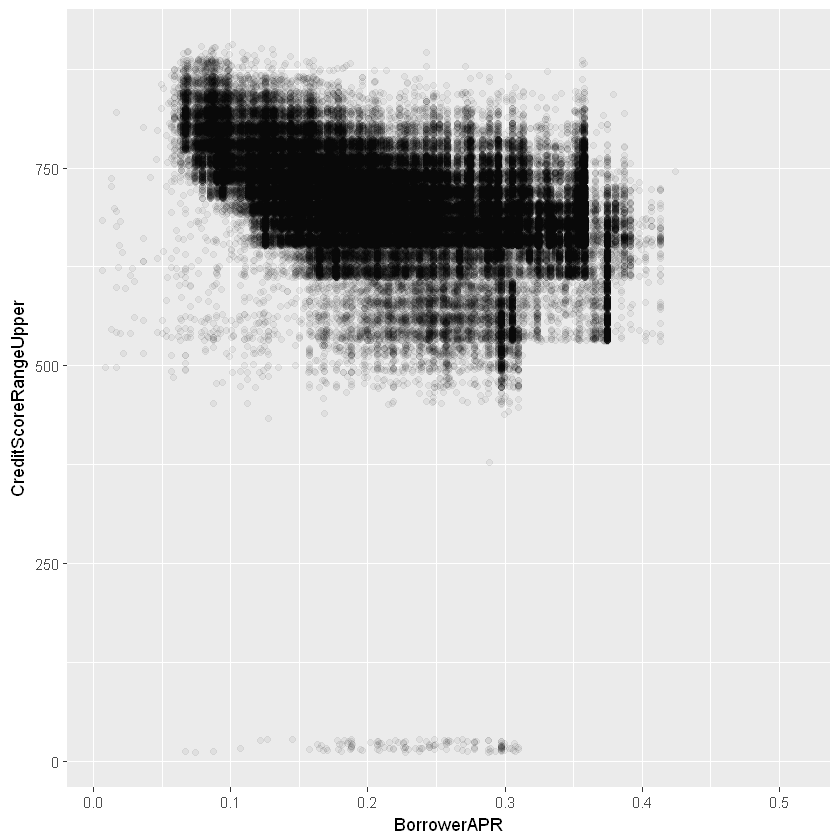

In [175]:
#Borrower APR vs Credit Score Range(s)
#This could perhaps be improved by creating a new Credit Score Variable
ggplot(df, aes(BorrowerAPR, CreditScoreRangeUpper)) + geom_jitter(alpha = 1/20)

This is some of what we would expect to see. The higher your Credit Score the lower your APR. <p>But the thing that jumps out is the strange cluster of loans that are hovering right above 0% Apr. Let's take a look at those.
Also, see that line at .3? wonder if there is legal or psycological at work here.

In [179]:
df %>%
filter(CreditScoreRangeUpper < 250) %>%
select(contains('Credit')) 

CreditGrade,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,RevolvingCreditBalance,AvailableBankcardCredit
NC,2007-02-11 12:46:31.633000000,0,19,,NA,NA,NA,NA,0
NC,2006-11-10 06:15:36.980000000,0,19,2001-03-21 00:00:00,NA,NA,2,NA,NA
NC,2007-02-06 08:28:22.457000000,0,19,,NA,NA,NA,NA,NA
NC,2006-04-23 14:08:38.650000000,0,19,2000-08-21 00:00:00,NA,NA,6,NA,NA
NC,2006-08-06 10:11:24.640000000,0,19,2001-06-21 00:00:00,NA,NA,2,NA,NA
NC,2006-09-22 06:57:16.473000000,0,19,,NA,NA,NA,NA,NA
NC,2007-01-17 18:44:02.840000000,0,19,2002-05-27 00:00:00,NA,NA,5,NA,NA
NC,2006-12-16 13:21:32.720000000,0,19,2005-10-12 00:00:00,NA,NA,2,NA,NA
NC,2007-01-16 07:22:23.933000000,0,19,,NA,NA,NA,NA,NA
NC,2006-09-16 13:15:04.260000000,0,19,2006-03-03 00:00:00,NA,NA,2,NA,NA


Looks like there is something that causes some people with no credit to be listed with a Lower Credit Score Range of 0 and an Upper of 19. It's interesting to me that loans can be made to these types of users. Might be worth exploring this population further.

Warning message:
"Removed 25 rows containing non-finite values (stat_boxplot)."

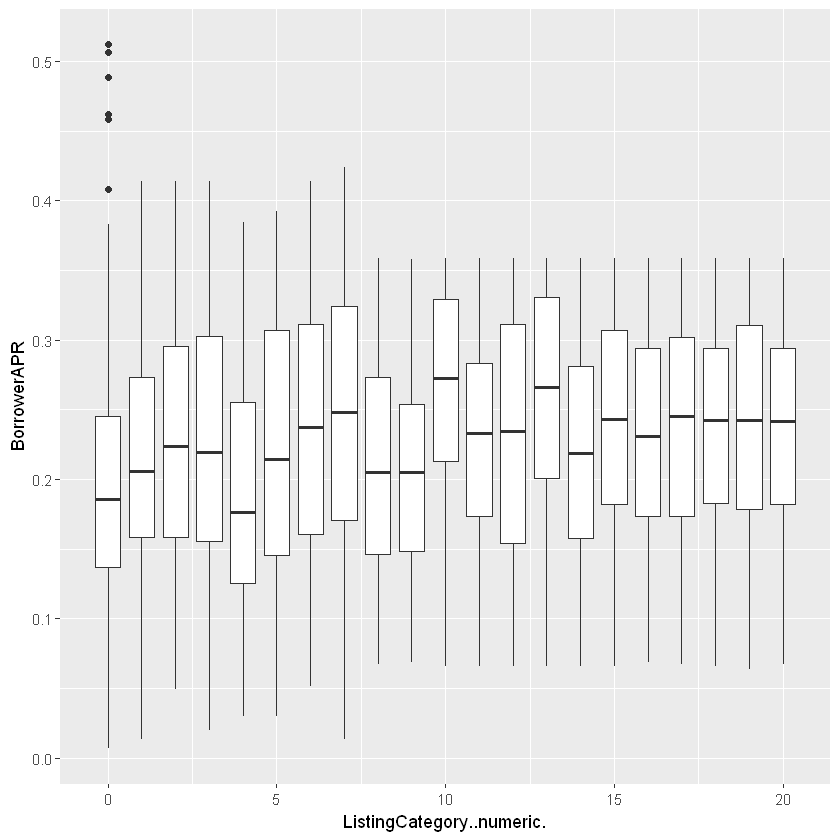

In [184]:
#Borrower APR vs Listing Category
df %>%
ggplot(aes(y=BorrowerAPR, x=ListingCategory..numeric., group=ListingCategory..numeric.)) + geom_boxplot()
#arrange by mean

Could do a t-test here to see if one category gets differnt APR than others. How does that account for other factors?

Warning message:
"Removed 1 rows containing missing values (position_stack)."

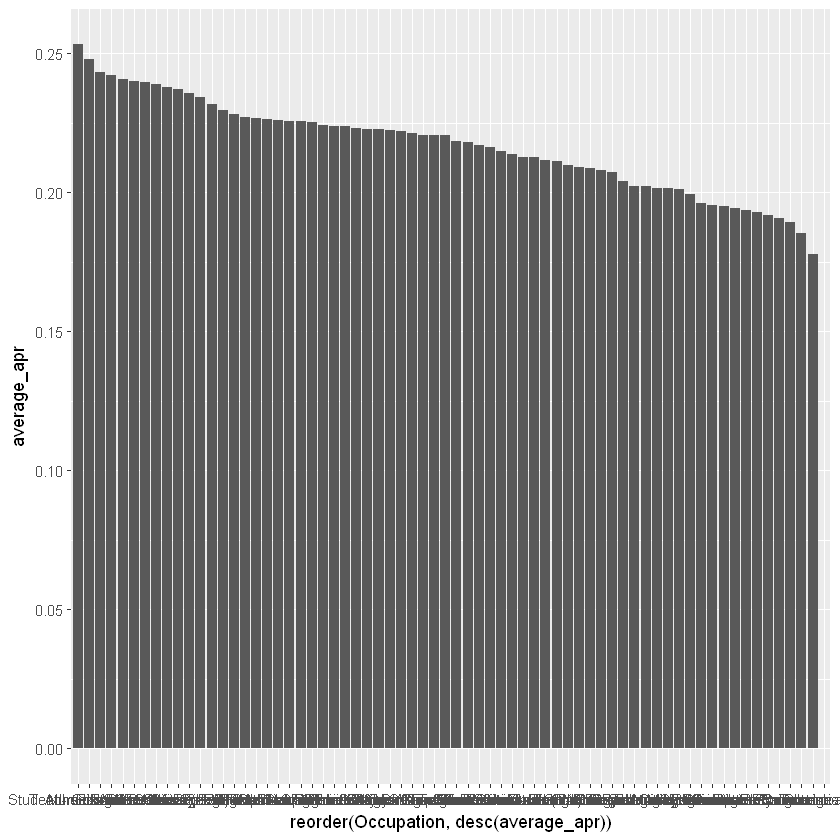

In [194]:
#Borrower APR vs Occupation
#Probably linked to what those occupations make. 
#Let's try something different and bar plot the means
df %>%
group_by(Occupation) %>%
summarise(average_apr = mean(BorrowerAPR)) %>%
ggplot(aes(x=reorder(Occupation,desc(average_apr)), y=average_apr)) + geom_bar(stat = "Identity")
#Need to re ararnge and work Income in there are a third variable

Warning message:
"Removed 1 rows containing missing values (position_stack)."

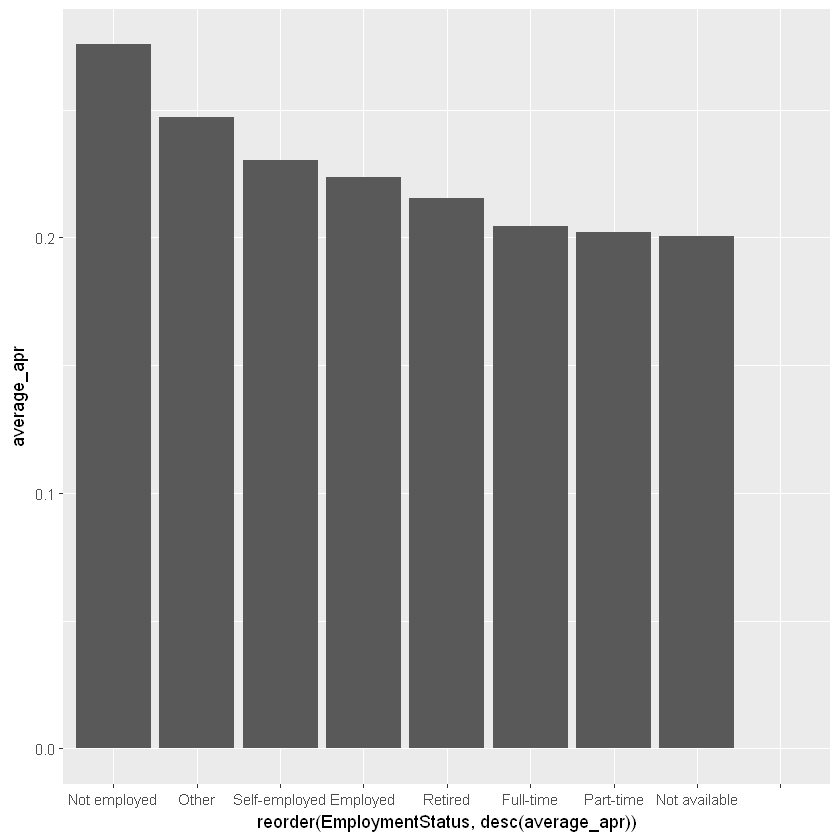

In [206]:
#Borrower APR vs Employment Duration 
#could probably do a t-test here too
#Not available has the lowest average apr?
#should probably be looking with boxplots
df %>%
group_by(EmploymentStatus) %>%
summarise(average_apr =  mean(BorrowerAPR)) %>%
ggplot(aes(x=reorder(EmploymentStatus, desc(average_apr)), y=average_apr)) + geom_bar(stat="Identity")

Warning message:
"Removed 16 rows containing missing values (geom_point)."

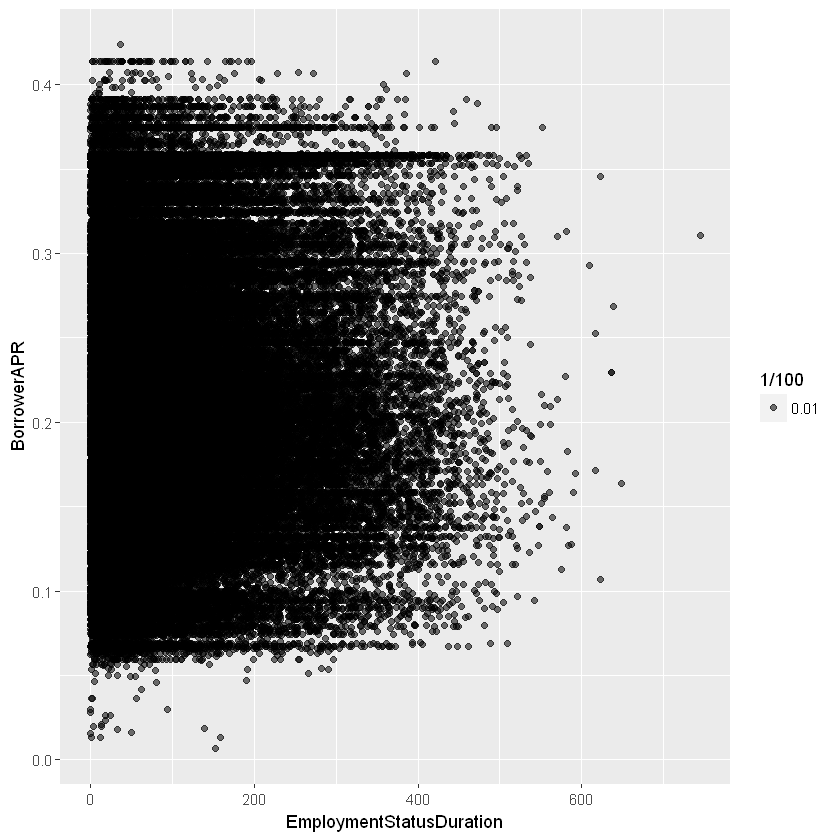

In [211]:
#If employed, does the length of your employment effect borrower apr?
#Normal with spikes? Is there a way to check how normal a distribution is?

df %>%
filter(EmploymentStatus %in% c('Self-employed','Employed','Full-time','Part-time')) %>%
ggplot(aes(x=EmploymentStatusDuration, y=BorrowerAPR, alpha=1/100)) + geom_point()

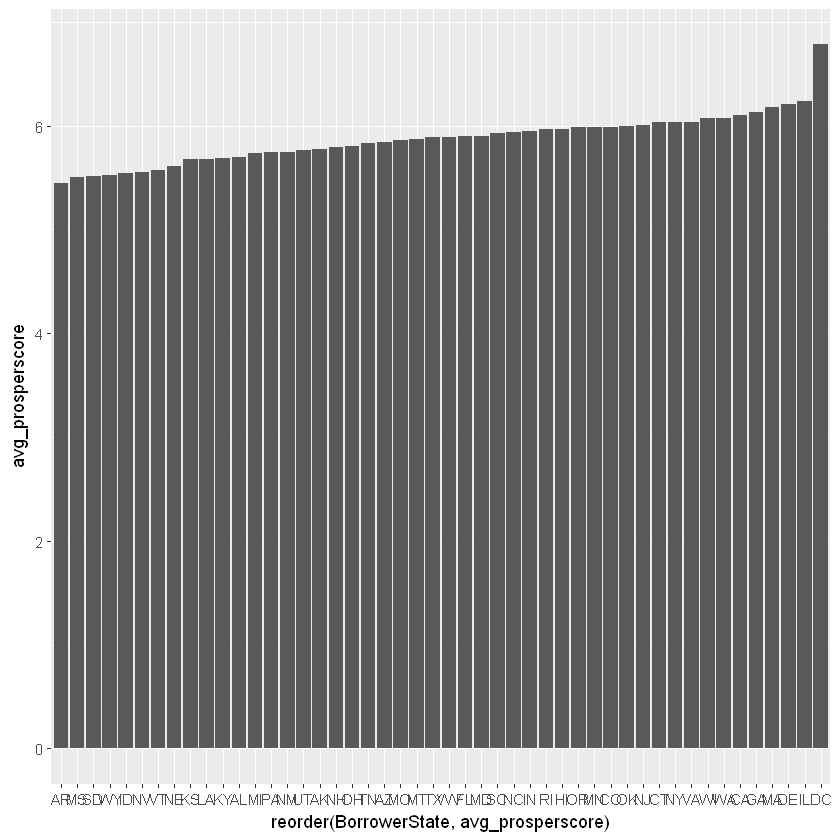

In [23]:
#Prosper Score ----
#ProseperScore vs Borrower State
df %>%
filter(!is.na(ProsperScore)) %>%
group_by(BorrowerState) %>%
summarise(avg_prosperscore = mean(ProsperScore)) %>%
ggplot(aes(x=reorder(BorrowerState, avg_prosperscore),y=avg_prosperscore)) + 
geom_bar(stat="Identity")

Warning message:
"Removed 29084 rows containing non-finite values (stat_boxplot)."

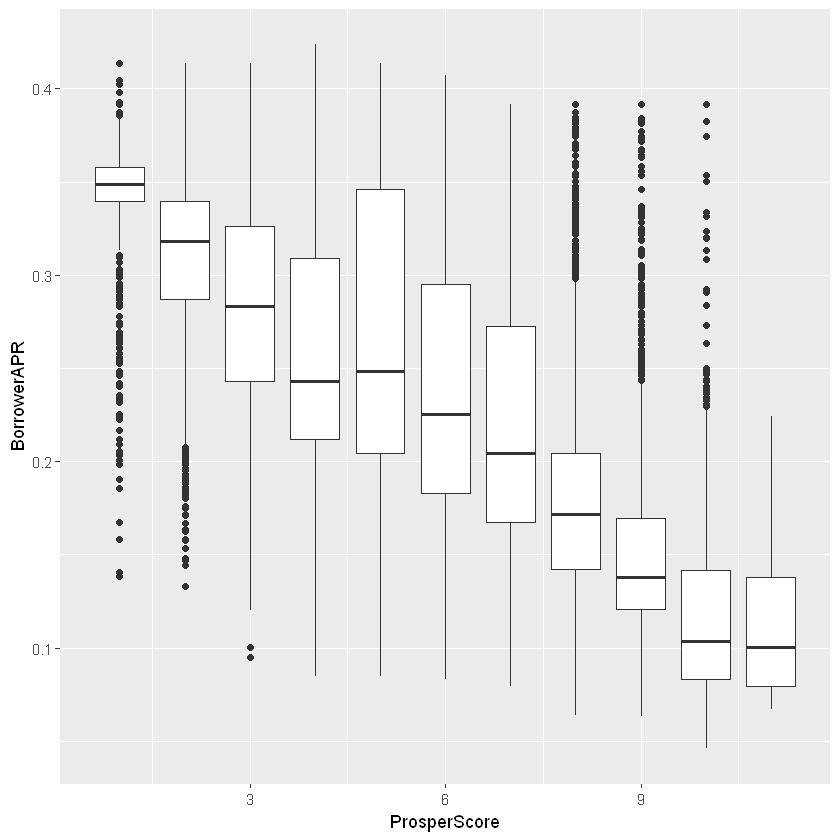

In [28]:
#Prosper Score vs Borrower APR
df %>%
ggplot(aes(x=ProsperScore, y=BorrowerAPR, group=ProsperScore)) + geom_boxplot()

Fiarly linear, but you can see that the ProsperScore isn't the total predictor in APR

Warning message:
"Removed 29084 rows containing non-finite values (stat_boxplot)."

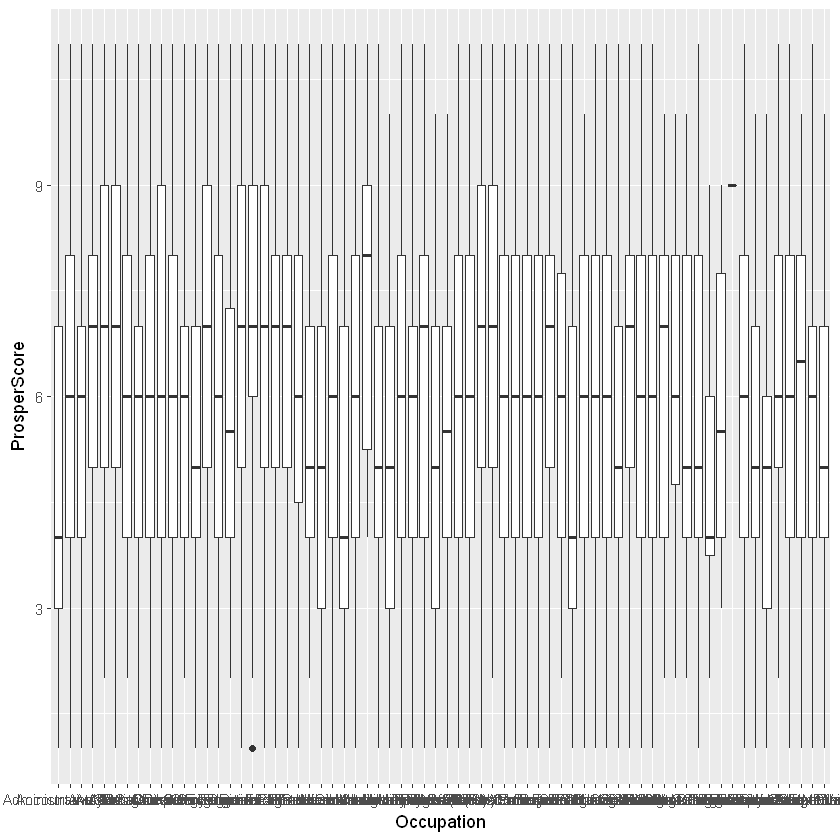

In [33]:
#Average ProsperScore vs Occupation
#Would expect this to be very similiar to BorrowerAPR vs Occupation, maybe can lose?
df %>%
ggplot(aes(y=ProsperScore, x=Occupation, group=Occupation)) + geom_boxplot()

In [ ]:
#ProsperScore vs Employment Status

In [ ]:
#ProsperScore vs Credit Range

In [36]:
#Listing Category ----
#Listing Category vs Borrower State
df %>%
group_by(BorrowerState, ListingCategory..numeric.) %>%
summarise(count = n()) %>%
filter(count == max(count))


BorrowerState,ListingCategory..numeric.,count
,0,5474
AK,1,104
AL,1,835
AR,1,493
AZ,1,939
CA,1,7707
CO,1,1220
CT,1,966
DC,1,236
DE,1,185


In [39]:
#Listing Category --
#Occupation
df %>%
group_by(Occupation, ListingCategory..numeric.) %>%
summarise(count = n()) %>%
filter(count == max(count)) %>%
filter(ListingCategory..numeric. != 1)

Occupation,ListingCategory..numeric.,count
,0,2255
Homemaker,0,50
Realtor,0,178
Student - College Freshman,5,13
Student - College Graduate Student,0,84
Student - College Junior,0,54
Student - College Senior,0,69
Student - College Sophomore,0,30
Student - Community College,0,13
Student - Technical School,0,9


In [ ]:
#Listing Category vs Employment Status
#Basically, employed vs unemployed vs retired
#Will do this after grouping Employment Status. 

In [54]:
#Listing Category vs Credit Score
#Do people with low credit scores list for something in particular?
df %>%
select(CreditScoreRangeUpper, ListingCategory..numeric.) %>%
filter(CreditScoreRangeUpper > 250) %>%
mutate(bin = ntile(CreditScoreRangeUpper, 5)) %>%
group_by(bin, ListingCategory..numeric.) %>%
summarise(count = n(),
          minCredit = min(CreditScoreRangeUpper),
         maxCredit = max(CreditScoreRangeUpper)) %>%
filter(count == max(count)) 

bin,ListingCategory..numeric.,count,minCredit,maxCredit
1,0,9027,379,659
2,1,12920,659,699
3,1,13701,699,719
4,1,13396,719,759
5,1,10926,759,899


In [71]:
#--Borrower State
#Occupation
df %>% 
select(BorrowerState, Occupation) %>%
filter(BorrowerState != "") %>%
group_by(BorrowerState, Occupation) %>%
summarise(count = n()) %>%
filter(Occupation != "Other" & Occupation !="Professional") %>%
filter(count == max(count))


BorrowerState,Occupation,count
AK,Skilled Labor,13
AL,Skilled Labor,79
AR,Teacher,43
AZ,Sales - Commission,68
CA,Executive,648
CO,Executive,109
CT,Executive,85
DC,Analyst,34
DE,Analyst,14
DE,Computer Programmer,14


In [73]:
#Borrower State Income Range (most common)
df %>%
select(BorrowerState, IncomeRange) %>%
group_by(BorrowerState, IncomeRange) %>%
summarise(count = n()) %>%
filter(count == max(count))

BorrowerState,IncomeRange,count
,Not displayed,3813
AK,"$50,000-74,999",71
AL,"$25,000-49,999",543
AR,"$25,000-49,999",328
AZ,"$25,000-49,999",604
CA,"$50,000-74,999",3947
CO,"$50,000-74,999",658
CT,"$50,000-74,999",472
DC,"$100,000+",102
DE,"$25,000-49,999",95
